Fashion_mnist

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matirx(y_true, y_pred, classes = None,
                          figsize = (10, 10), text_size = 15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape

  fig, ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  
  
  if classes:
    labels = classes

  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion matrix", 
        xlabel = "predicted label",
        ylabel = "True label",
        xticks = np.arange(*n_classes),
        yticks = np.arange(*n_classes),
        yticklabels = labels,
        xticklabels = labels)



  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)

  ax.title.set_size(text_size)



  threshold = (cm.max()+cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size = 15)

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_labels[0]

9

In [4]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

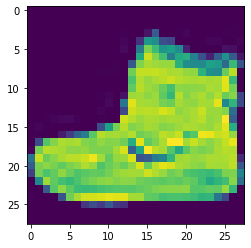

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

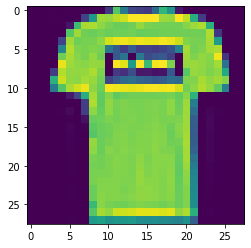

In [7]:
plt.imshow(train_data[1])

In [8]:
train_labels[7]

2

In [9]:
class_names = ["T-shirt/Top", "Trouser", "PullOver", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/Top')

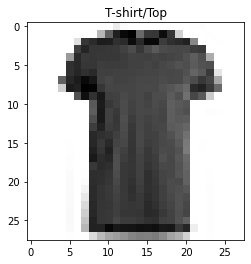

In [10]:
index_of_choice = 17

plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

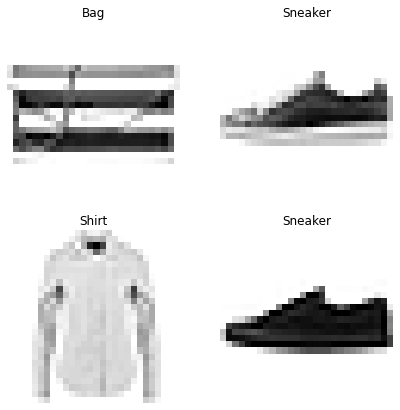

In [11]:
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [12]:
train_data[0].shape

(28, 28)

In [13]:
train_labels[0].shape

()

In [14]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28))
])

flatten_model.output_shape


(None, 784)

In [15]:
28 * 28

784

In [16]:
train_labels[0]

9

In [17]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [20]:
import tensorflow as tf
tf.random.set_seed(42)

fashion_mnist_nish = tf.keras.Sequential([
    # flattens the data a/c to the input data.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    # tf.keras.layers.Dense(1, activation = "softmax")
    # tf.keras.layers.Dense(4, activation = "relu"),
    # tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

fashion_mnist_nish.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                      metrics = ["accuracy"])

history_nish = fashion_mnist_nish.fit(train_data, train_labels, epochs = 10,
                            validation_data = (test_data, test_labels))


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.7825 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0976 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0999 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [21]:
tf.one_hot(train_labels[:10], depth = 10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [23]:
import tensorflow as tf
tf.random.set_seed(42)

fashion_mnist_dan = tf.keras.Sequential([
    # flattens the data a/c to the input data.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

fashion_mnist_dan.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                      metrics = ["accuracy"])

history_dan = fashion_mnist_dan.fit(train_data, tf.one_hot(train_labels,
                                                   depth = 10),
                            epochs = 10,
                            validation_data = (test_data,
                                               tf.one_hot(test_labels, 
                                                          depth = 10)))


Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 2.3443 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0976 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy: 0.1000
Epo

In [24]:
fashion_mnist_dan.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 3140      
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_data.min(), train_data.max()

(0, 255)

# Normalizing the data

In [26]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

# neural netowork with normalized data

In [28]:
tf.random.set_seed(42)

fashion_mnist_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

fashion_mnist_norm.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy,
                           optimizer = tf.keras.optimizers.Adam(0.01),
                           metrics = ["accuracy"])

history_norm = fashion_mnist_norm.fit(train_data_norm, train_labels,
                                 epochs = 10,
                                 validation_data = (test_data_norm, test_labels))

                                      
                                      
                                      

Epoch 1/10


TypeError: ignored

In [29]:
tf.random.set_seed(42)

fashion_mnist_norm = tf.keras.Sequential([
    # flattens the data a/c to the input data.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    # tf.keras.layers.Dense(4, activation = "relu"),
    # tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

fashion_mnist_norm.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                      metrics = ["accuracy"])

history_norm_mnist = fashion_mnist_norm.fit(train_data_norm, train_labels,
                                      validation_data = (test_data_norm, test_labels),
                                      epochs = 10)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5978 - accuracy: 0.7832 - val_loss: 0.4934 - val_accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4680 - accuracy: 0.8361 - val_loss: 0.4911 - val_accuracy: 0.8344
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8457 - val_loss: 0.5013 - val_accuracy: 0.8217
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4362 - accuracy: 0.8487 - val_loss: 0.4926 - val_accuracy: 0.8366
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4205 - accuracy: 0.8544 - val_loss: 0.5363 - val_accuracy: 0.8316
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4167 - accuracy: 0.8565 - val_loss: 0.4826 - val_accuracy: 0.8358
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4275 - accuracy: 0.8540 - val_loss: 0.5262 - val_accuracy:

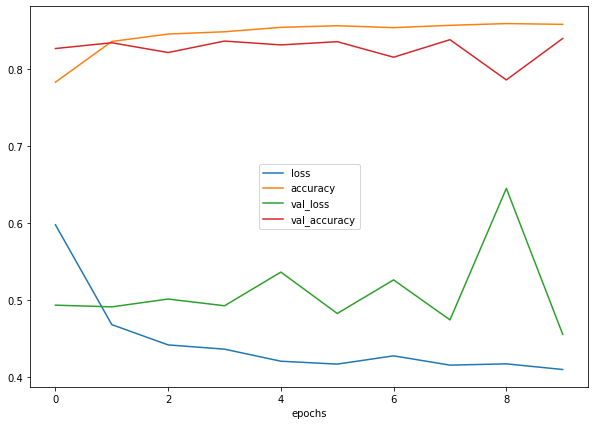

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(history_norm_mnist.history).plot(figsize = (10, 7),
                                              xlabel = "epochs")

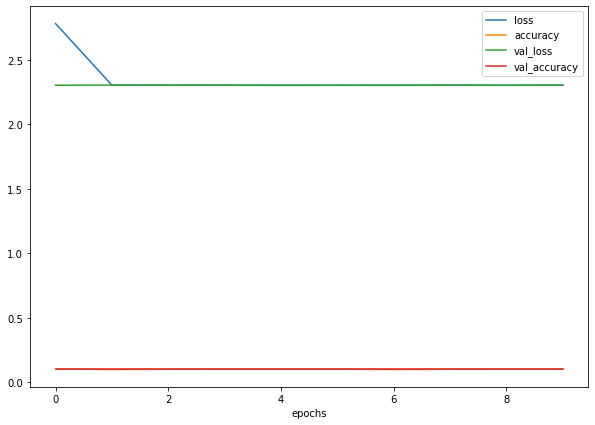

In [31]:
pd.DataFrame(history_nish.history).plot(figsize = (10, 7),
                                        xlabel = "epochs")

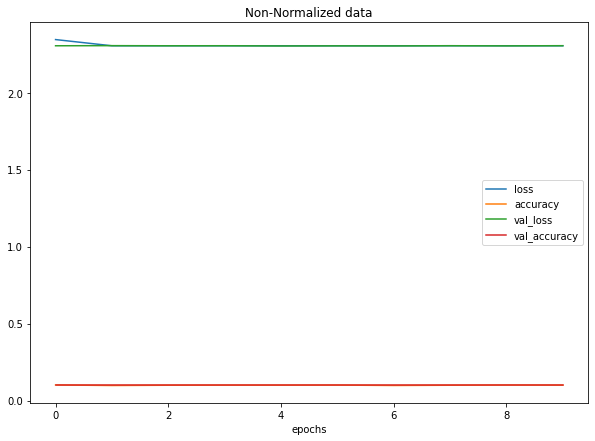

In [32]:
pd.DataFrame(history_dan.history).plot(figsize = (10, 7),
                                       xlabel = "epochs",
                                       title = "Non-Normalized data")

model_13 optimal model

In [33]:
import tensorflow as tf

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics = ["accuracy"])

history_13 = model_13.fit(train_data_norm, train_labels, 
                          validation_data = (test_data_norm,
                                             test_labels),
                          epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5299 - accuracy: 0.8110 - val_loss: 0.4184 - val_accuracy: 0.8488
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3798 - accuracy: 0.8598 - val_loss: 0.4554 - val_accuracy: 0.8421
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3423 - accuracy: 0.8744 - val_loss: 0.3964 - val_accuracy: 0.8563
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3207 - accuracy: 0.8821 - val_loss: 0.3694 - val_accuracy: 0.8700
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.8877 - val_loss: 0.3653 - val_accuracy: 0.8675
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.8921 - val_loss: 0.4125 - val_accuracy: 0.8468
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.8956 - val_loss: 0.3535 - val_accuracy:

In [34]:
y_probs = model_13.predict(test_data_norm) 

y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[7.6409165e-12, 9.4886765e-08, 1.1073291e-09, 7.8101117e-09,
        5.0602022e-08, 1.2130411e-04, 5.9238427e-09, 9.8783465e-04,
        1.4550385e-08, 9.9889070e-01],
       [2.1008969e-07, 2.4797753e-19, 9.9984479e-01, 7.5539219e-12,
        1.3069715e-04, 3.2169945e-21, 2.4209307e-05, 1.7753649e-23,
        1.2070904e-11, 1.7114553e-21],
       [2.3031917e-10, 1.0000000e+00, 3.4806999e-17, 6.1634633e-13,
        5.2910765e-18, 2.9464558e-18, 1.3767362e-11, 8.3561016e-18,
        4.7764973e-11, 4.3427440e-14],
       [7.3041873e-10, 1.0000000e+00, 1.9752088e-14, 1.8291406e-10,
        6.4120627e-15, 1.5555805e-15, 1.5810550e-10, 1.8405213e-14,
        3.4066180e-10, 1.9133166e-11],
       [2.2562659e-01, 2.2184432e-07, 3.7563857e-02, 9.9477032e-04,
        5.2039418e-04, 1.0210883e-08, 7.3528296e-01, 5.3435133e-15,
        1.1187100e-05, 1.2038073e-14]], dtype=float32)

In [35]:
y_probs[0]

array([7.6409165e-12, 9.4886765e-08, 1.1073291e-09, 7.8101117e-09,
       5.0602022e-08, 1.2130411e-04, 5.9238427e-09, 9.8783465e-04,
       1.4550385e-08, 9.9889070e-01], dtype=float32)

In [36]:
tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

Coverted the probabilities into the integer

In [37]:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[855,   3,  13,  27,   5,   1,  90,   0,   6,   0],
       [  2, 969,   7,  17,   3,   0,   1,   0,   1,   0],
       [ 11,   0, 791,  10, 135,   0,  53,   0,   0,   0],
       [ 25,   6,  15, 869,  59,   0,  24,   0,   2,   0],
       [  0,   0,  76,  14, 885,   0,  25,   0,   0,   0],
       [  0,   0,   0,   0,   1, 968,   0,  16,   0,  15],
       [133,   0,  80,  32, 121,   0, 631,   0,   3,   0],
       [  0,   0,   0,   0,   2,   8,   0, 973,   2,  15],
       [  2,   0,   4,   3,   7,   1,  13,   1, 969,   0],
       [  0,   0,   0,   0,   2,  11,   1,  40,   0, 946]])

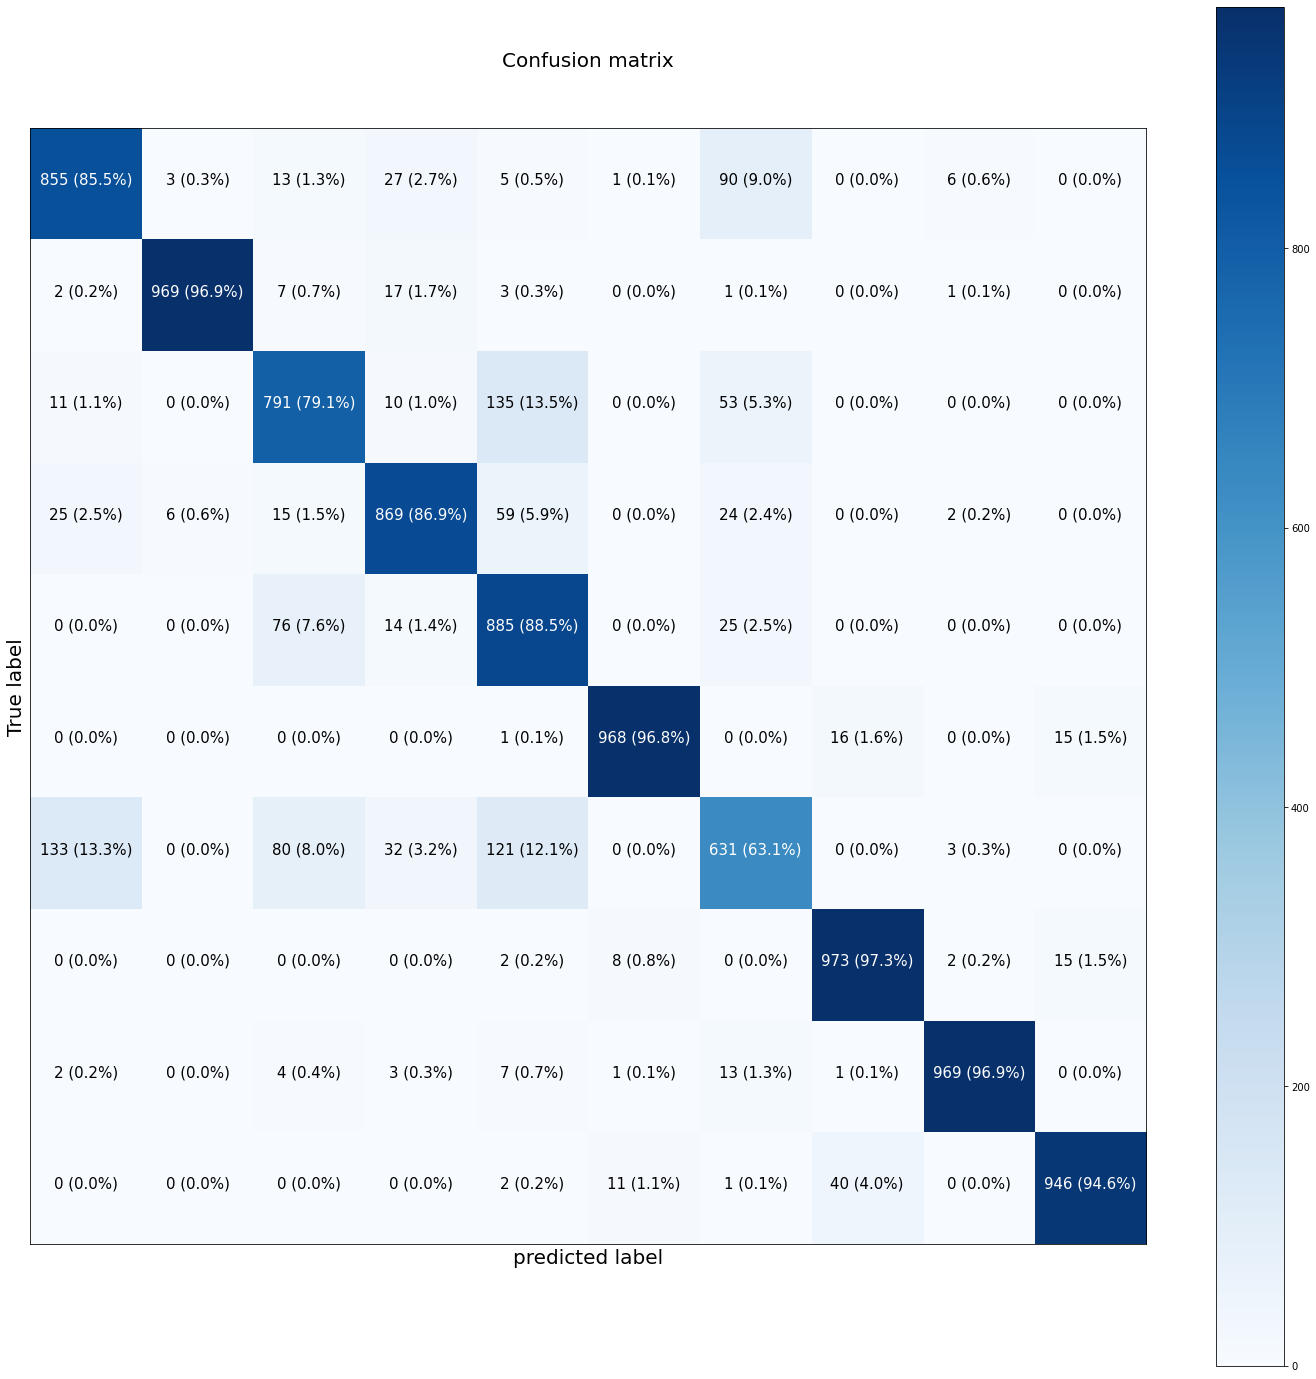

In [39]:
make_confusion_matirx(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (25, 25),
                      text_size = 20)


In [40]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction
  and truth label.
  """
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
             color = color)

  

1/1 [==============================] - 0s 19ms/step


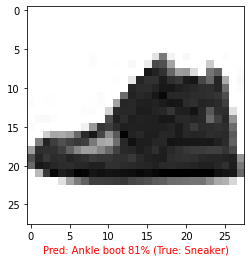

In [41]:
plot_random_image(model = model_13,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [42]:
model_13.layers

In [43]:
model_13.layers[1]

In [44]:
weights1, biases1 = model_13.layers[1].get_weights()
weights1, weights1.shape, len(weights1)

(array([[ 0.03233584,  0.11220322,  0.05084603, ..., -0.06670354,
         -0.041912  , -0.19822368],
        [-0.07912138,  0.03298238, -0.12917896, ...,  0.11327955,
         -0.02154332, -0.47739905],
        [-0.07584291,  0.14438213, -0.4770029 , ...,  0.00205155,
          0.08141735,  0.10516101],
        ...,
        [-0.36808982,  0.12843879, -0.4897307 , ...,  0.38672224,
          0.12859076,  0.02864579],
        [-0.4766334 ,  0.33401057, -0.3422996 , ...,  0.01882435,
          0.07916085,  0.5544518 ],
        [-0.42511633,  0.78393126,  0.20390144, ..., -0.20589833,
          0.16800341,  0.7788349 ]], dtype=float32), (784, 100), 784)

In [45]:
biases1, biases1.shape

(array([ 0.03890852,  0.5493895 ,  0.5062377 , -0.45313656,  0.17395326,
        -0.25198835,  0.21315822,  0.06441762,  0.60653746,  0.30202088,
         0.43538076,  0.35479087,  0.16394702, -0.11908347,  0.45395768,
         0.11207408,  0.1310931 , -0.00341396, -0.02448493, -0.0149611 ,
        -0.21851166, -0.05011471, -0.01324486,  0.47864994, -0.01236831,
        -0.1471537 , -0.05517727,  0.6711597 , -0.17741641, -0.21012041,
         0.17533359,  0.42199552,  0.15475222, -0.3391664 ,  0.68385655,
        -0.5039416 ,  0.02439134,  0.23552541,  0.03959521,  0.3174801 ,
         0.8010363 ,  0.5012865 ,  0.67580855,  0.01907925,  0.25624683,
         0.40302896,  0.07537405,  0.2848675 ,  0.08936549, -0.04322143,
         0.20261313,  0.01852286, -0.01204967,  0.41008994, -0.50661385,
        -1.2545418 ,  0.5467036 ,  0.3105836 ,  0.06442533, -0.01648832,
         0.14603387,  0.06751491,  0.31257376,  0.34528017, -0.0819452 ,
         0.2638703 , -0.4499934 ,  0.2661827 ,  0.2

In [46]:
model_13.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 100)               78500     
                                                                 
 dense_40 (Dense)            (None, 75)                7575      
                                                                 
 dense_41 (Dense)            (None, 50)                3800      
                                                                 
 dense_42 (Dense)            (None, 25)                1275      
                                                                 
 dense_43 (Dense)            (None, 10)                260       
                                                                 
Total params: 91,410
Trainable params: 91,410
Non-trai

In [47]:
weights, biases = model_13.layers[5].get_weights()
weights, weights.shape, len(weights)


(array([[-1.11510135e-01, -1.81522518e-01, -4.72780829e-03,
         -1.67448536e-01,  3.83901969e-02, -7.71941543e-01,
         -5.02922773e-01, -7.04126537e-01, -6.06814027e-01,
         -3.78992587e-01],
        [ 3.70485157e-01, -4.48609412e-01,  3.70429397e-01,
          2.24447712e-01, -7.12569803e-02,  1.99040636e-01,
          2.83682913e-01, -3.82845372e-01, -1.65457129e-02,
         -3.79061073e-01],
        [-4.67243463e-01, -4.11948204e-01, -4.50804055e-01,
         -1.88144296e-01, -3.10379565e-01,  2.29586035e-01,
         -2.18126431e-01,  7.94209242e-02, -1.03672102e-01,
         -3.01254034e-01],
        [-4.40166980e-01, -6.46737218e-01,  2.09543481e-01,
          2.35393584e-01,  3.04111689e-01, -4.23855394e-01,
          1.88226491e-01,  8.87247398e-02, -1.80852726e-01,
          1.72604710e-01],
        [-6.87787384e-02,  5.22918046e-01, -1.41689330e-02,
          3.73913586e-01, -7.84288347e-02, -7.69457400e-01,
         -1.77280024e-01, -6.36732429e-02,  1.227744

In [48]:
biases, biases.shape

(array([-0.12912317, -0.12025428,  0.11297209,  0.21024884, -0.1703016 ,
        -0.12021545,  0.13603617, -0.03183464,  0.16549215, -0.20396444],
       dtype=float32), (10,))

In [49]:
model_13.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 100)               78500     
                                                                 
 dense_40 (Dense)            (None, 75)                7575      
                                                                 
 dense_41 (Dense)            (None, 50)                3800      
                                                                 
 dense_42 (Dense)            (None, 25)                1275      
                                                                 
 dense_43 (Dense)            (None, 10)                260       
                                                                 
Total params: 91,410
Trainable params: 91,410
Non-trai

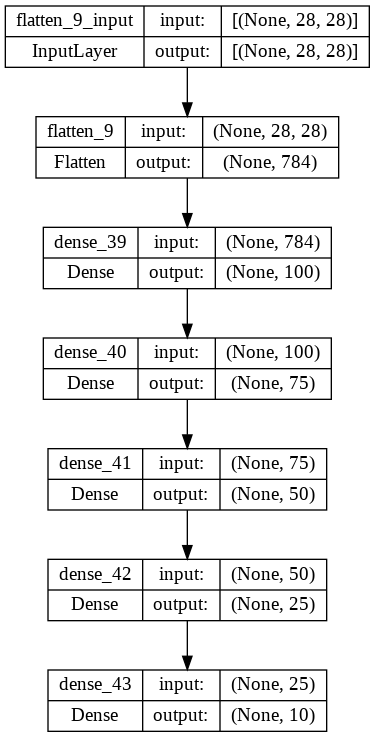

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model_13, show_shapes = True)

In [51]:
model_13.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 100)               78500     
                                                                 
 dense_40 (Dense)            (None, 75)                7575      
                                                                 
 dense_41 (Dense)            (None, 50)                3800      
                                                                 
 dense_42 (Dense)            (None, 25)                1275      
                                                                 
 dense_43 (Dense)            (None, 10)                260       
                                                                 
Total params: 91,410
Trainable params: 91,410
Non-trai

In [52]:
test_labels, y_preds

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), array([9, 2, 1, ..., 8, 1, 5]))

In [53]:
class_names

['T-shirt/Top',
 'Trouser',
 'PullOver',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

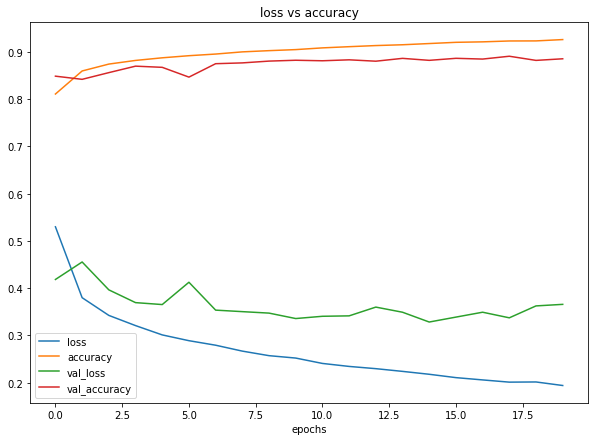

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history_13.history).plot(figsize = (10, 7),
                                      xlabel = "epochs",
                                      title = "loss vs accuracy")

In [56]:
import tensorflow as tf

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

history_14_lr = model_14.fit(train_data_norm, train_labels, 
                          validation_data = (test_data_norm,
                                             test_labels),
                          epochs = 20,
                          callbacks = [lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5299 - accuracy: 0.8110 - val_loss: 0.4184 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3847 - accuracy: 0.8593 - val_loss: 0.4412 - val_accuracy: 0.8453 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3512 - accuracy: 0.8701 - val_loss: 0.4001 - val_accuracy: 0.8551 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.8779 - val_loss: 0.3721 - val_accuracy: 0.8673 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3204 - accuracy: 0.8819 - val_loss: 0.3633 - val_accuracy: 0.8676 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3135 - accuracy: 0.8836 - val_loss: 0.4353 - val_accuracy: 0.8389 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 5s

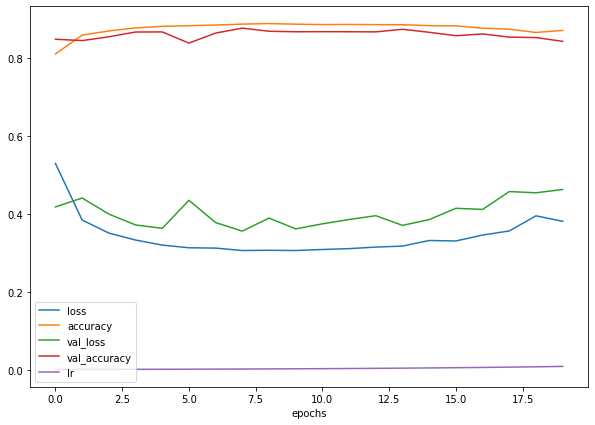

In [57]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(history_14_lr.history).plot(figsize = (10, 7),
                                         xlabel = "epochs")

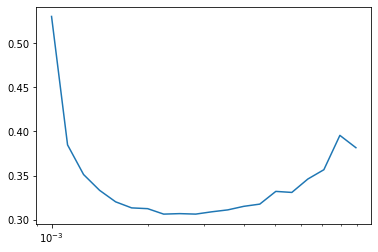

In [59]:
import numpy as np
import matplotlib.pyplot as plot


lrs = 1e-3 * (10**(tf.range(20)/20))




plot.semilogx(lrs, history_14_lr.history["loss"])

